1. [Adaptive Boosting - Regression](#adaptive-boosting---regression)

#### Adaptive Boosting - Regression:
- uses SAMME algorithm (Stagewise Additive Modeling using a Multi-class Exponential loss function)
- connecting weak learners in series
- created by forest of stumps 
- consider the dataset with 3 features and regression numerical continuous target variable 
    - consider we have 8 records
- first, we assign equal sample weights to all the records in the dataset
    - considering 8 records, the sample weights would be 1/8 for all the 8 records
- we create stumps for each feature with relevance to target variable i.e. a node with two leaf nodes
- In Adaboost some stumps will have higher say than other stumps unlike random forest were all trees built have equal importance in the decision of prediction
- In Adaboost the ordering of the stumps are important unlike in Random Forest

| Feature 1 | Feature 2 | Target | Sample Weight |
|---|---|---|---|
| 1 | 2 | 5.2 | 0.2 |
| 2 | 4 | 6.8 | 0.2 |
| 3 | 1 | 4.1 | 0.2 |
| 4 | 3 | 7.5 | 0.2 |
| 5 | 5 | 8.9 | 0.2 |

- After creating the stumps for each feature, we calculate the RSS for each stump
- For numerical feature, 
    - we use the average of adjacent samples for the entire dataset
    - we then calculate the RSS value for the averages from the first to the last record and identify the lowest RSS for that feature
- We choose the stumps with the lowest RSS value to be the root stump
- Before calculating the Total Error, we make initial predictions from the first stump


| Feature 1 | Feature 2 | Target | Sample Weight | Initial Prediction |
|---|---|---|---|---|
| 1 | 2 | 5.2 | 0.2 | 4.3 |
| 2 | 4 | 6.8 | 0.2 | 5.4 |
| 3 | 1 | 4.1 | 0.2 | 4 |
| 4 | 3 | 7.5 | 0.2 | 6.6 |
| 5 | 5 | 8.9 | 0.2 | 7 |

- Now, we calculate the Total Error value based on the error metrics such as Absolute Error, Squared Error, Relative Error
    - we use the relative error here
        - Relative Error = (Observed - Predicted)/Max(Observed - Predicted)

| Feature 1 | Feature 2 | Target | Sample Weight | Initial Prediction | Residual | Relative Error |
|---|---|---|---|---|---|---|
| 1 | 2 | 5.2 | 0.2 | 4.3 | 0.9 | 0.47 |
| 2 | 4 | 6.8 | 0.2 | 5.4 | 1.4 | 0.73 |
| 3 | 1 | 4.1 | 0.2 | 4 | 0.1 | 0.05 |
| 4 | 3 | 7.5 | 0.2 | 6.7 | 0.8 | 0.42 |
| 5 | 5 | 8.9 | 0.2 | 7 | 1.9 | 1 |

- to get the total error value, we take the mean or median of the Relative error for every instances
    - TE = (0.47 + 0.73 + 0.05 + 0.42 + 1)/5 = 2.67/5 => 0.534

- now, we calculate the performance of the stump 
    - amount of say or performance = β * log((1 -TE)/TE) = 1 * ln((1-0.534)/0.534) => 0.87
        - β = 1

- the Total Error vs Performance represented in a graph below
    - Total Error = 0, Performance = 3 and more (very good)
    - Total Error = 0.5, Performance = 0 (unable to make any decision)
    - Total Error = 1, Performance = -3 and more (always predict the opposite class)

Note:
- Total Error cannot be 0 or 1 practically, so a small error term is added to the performance formula

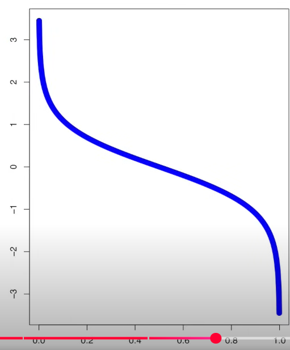

In [4]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/performance_graph.png')
new_image = img.resize((290, 350))
display(new_image)

- now, we update the sample weights for the records using the formula below,
    - Wnew = Wold + exp^(amount of say * relative error)
- we substitute the updated values into the new updated weight column

| Feature 1 | Feature 2 | Target | Sample Weight | Initial Prediction | Residual | Relative Error | Updated Weight |
|---|---|---|---|---|---|---|---|
| 1 | 2 | 5.2 | 0.2 | 4.3 | 0.9 | 0.47 | 0.301 |
| 2 | 4 | 6.8 | 0.2 | 5.4 | 1.4 | 0.73 | 0.377 |
| 3 | 1 | 4.1 | 0.2 | 4 | 0.1 | 0.05 | 0.208 |
| 4 | 3 | 7.5 | 0.2 | 6.7 | 0.8 | 0.42 | 0.288 |
| 5 | 5 | 8.9 | 0.2 | 7 | 1.9 | 1 | 0.477 |

- we, normalize the weights i.e. it necessary for the sum of weights for all the records to be equal to 1
    - so we sum all the weights of the records
    - we then divide the weight of each record with the sum of all weights of the records
- now, we make the normalized as the new sample weights to make the second stump and again use the RSS value
- repeat the same steps are before
- However, there is an alternate approach to weighted gini index, i.e. to create a collection of samples that contain the duplicate copies of the samples with the largest sample weights (misclassfied samples)
- in the alternate approach, we bucketize the normalized updated sample weights

| Feature 1 | Feature 2 | Target | Sample Weight | Initial Prediction | Residual | Relative Error | Updated Weight | Normalized Weight | Bucketized Weight |
|---|---|---|---|---|---|---|---|---|---|
| 1 | 2 | 5.2 | 0.2 | 4.3 | 0.9 | 0.47 | 0.301 | 0.18 | 0 - 0.18 |
| 2 | 4 | 6.8 | 0.2 | 5.4 | 1.4 | 0.73 | 0.377 | 0.23 | 0.18 - 0.41 |
| 3 | 1 | 4.1 | 0.2 | 4 | 0.1 | 0.05 | 0.208 | 0.13 | 0.41 - 0.54 |
| 4 | 3 | 7.5 | 0.2 | 6.7 | 0.8 | 0.42 | 0.288 | 0.17 | 0.54 - 0.71 |
| 5 | 5 | 8.9 | 0.2 | 7 | 1.9 | 1 | 0.477 | 0.29 | 0.71 - 1 |

- now, we randomly choose the values between 0 - 1 and fill the new dataset for the second weak learner
    - make sure if the original dataset had 50 records, we also need the new dataset to have 50 records as well which might contain duplicate records because of the emphasis of weights given to gradients with larger value i.e. the prediction is far off from observed values
- just like the start, we assign normalized sample weights to the records in the new datatset and we keep repeating it until the number of trees are built and trained as decided
- now while predicting the output class for a test records
    - Final Prediction = (weight_regressor_1 * prediction_regressor_1) + (weight_regressor_2 * prediction_regressor_2) + ... + (weight_regressor_n * prediction_regressor_n)
    - performance = weight_regressor

Learning Rate:
- Small Learning Rate:
    - Requires more weak learners (higher n_estimators).
    - Can lead to better generalization and reduced overfitting.
    - Slower convergence.
- Large Learning Rate:
    - Requires fewer weak learners.
    - Can lead to faster convergence.
    - Increases the risk of overfitting.